# Getting started with the UEDGE Toolbox

Welcome to the introduction of UETOOLS, short for the UEDGE Toolbox. The classes provided by UETOOLS interact with UEDGE on a fundamental level, and aims to provide the user with powerful tools to for running and processing UEDGE simulations. This guide will take you through the basics of UETOOLS. Some aspects of UEDGE functionality, important for understanding the functionality of the UETOOLS, will be presented briefly here, but more in-depth discussion of UEDGE itself is reserved for the UEDGE documentation itself. 

## TOC:
* [Installing UETOOLS](#installing-uetools)
* [Installing UEDGE](#installing-UEDGE)
    * [pip install](#pip)
    * [Local pip install](#local-pip)
    * [Run from directory using \\$PATH](#path)
* [Structure of UETOOLS](#structure)
    * [The Case class](#case-class)
    * [The Database class](#database-class)
* [Running UETOOLS the first time](#1sttime)
* [Indices, patches, and arrays in UEDGE](#uedge-maps)
    * [The UEDGE index space](#index-space)
    * [The UEDGE single-null patch map](#LSN-patch-map)
    * [UEDGE array dimension](#array-dimensions)
        * [Ion arrays](#ion-arrays)
        * [Gas arrays](#gas-arrays)
    * [UEDGE nodes and staggered grid](#nodes-grid)
        * [Cell structure](#cell-structure)
        * [Staggered grids](#staggered-grids)

## Installing UETOOLS<a class="anchor" id="installing-uetools"></a>
There are a number of ways to install and use UETOOLS, outlined below.

### pip install <a class="anchor" id="pip"></a>

The most straightforward way to install UETOOLS is by using pip install:
    
    pip install uedgetools
    
This will install all the dependencies necessary to run UETOOLS in standalone mode (see Chapter 2). In case UETOOLS is to be used in conjunction with UEDGE, the UEDGE dependencies can be installed using
   
    pip install "uedgetools[uedge]"
    
Other optional dependencies are those for parallel exectuion of UEDGE using UETOOLS, which can be installed using

    pip install "uedgetools[parallel]"
    
If all dependencies are desired, use

    pip install "uedgetools[uedge,parallel]"
    
### Local pip install<a class="anchor" id="local-pip"></a>
In case one needs to make changes to UETOOLS, the source code can be downloaded from the UETOOLS [GitHub repository](https://www.github.com/llnl/uetools) and edited locally. The package can then be installed by using
    
    pip install <path to UETOOLS> 
    
### Run from directory using \\$PATH<a class="anchor" id="path"></a>
UEDGE tools can also be used without installing the package. This can be done by downloading the source code as described above. Then, the location of `src/uetools` can be appended to the environment variable \\$PATH. Ideally, this should be done in the shell configuration file to be considered in every terminal prompt.

## Installing UEDGE<a class="anchor" id="installing-uedge"></a>
UEDGE is a prerequisite for UETOOLS. Since UEDGE can be installed by pip, or built locally, it is not, however, a forced prerequisite for installing UETOOLS. E.g. the user will need to ensure a functioning version of UEDGE is available to the Python command prompt. The most straightforward way to install UEDGE is using pip install
    pip install uedge
For more information on installing UEDGE, consult the UEDGE manual.
<!--- 
Downloading/installing/building
Recommend using pyenvs and pyenv-virtualvenvs
-->


## Structure of UETOOLS<a class="anchor" id="structure"></a>
UETOOLS provides the user with two primary classes for interacting with UEDGE case: the Case and Database classes. These are presented shhortly below.

### The Case Class<a class="anchor" id="case-class"></a>
Case is the primary class in UETOOLS, and handles most of the setup of a UEDGE case, and provides an interface for creating YAML input files for UEDGE. The base Case class inherits methods from several classes, making it very modular and easy to patch to the individual user needs. The Case class itself primarily handles the exchange of information with UEDGE, such as changing or getting variable values, setting up a case based on the input file, and restoring saved solutions. Here follows a short description of the most commonly used classes, which Case inherits:

- Caseplot: handles specific plotting, using the high-level plotting functions avilable in the Plot class.
- Save: handles saving of data to UETOOLS save-files, compatible the with UEDGE restore function. The UETOOLS save-files also store additional data, such as grid data, and some commonly used derived variables. Thus, UETOOLS can restore UEDGE cases from save-files only, removing the need for separate input and grid files. Additionally, the saves can be used as data dumps as discussed later.
- Solver: provides aliases for the UEDGE solvers through the Case class
- PostProcessors: contains a number of vetted and approved post-processors for numerous UEDGE quantities

### The Database Class<a class="anchor" id="database-class"></a>
Because only a single instance of UEDGE can be run in a Python prompt, UETOOLS provides a database class that can statically read data from UETOOLS save-files and compile them to databases that can be scanned/compared. Using a single Python prompt to restore many UEDGE cases in succession is to be avoided, as there may be issues with the grid sizes, or different setups can make modifications to variables which are not reset in subsequent files, making the results order-dependent. The database instead creates static UETOOLS Case objects that are stored in array, allowing data to be accessed for all cases stored, simultaneously.

The use of databases is discussed in greater detail below.

## Running UETOOLS for the first time<a class="anchor" id="1sttime"></a>
When creating a Case object, UETOOLS checks whether a configuration file for UETOOLS is present. If no configuration file is present, a message is raised:

In [1]:
from uetools import Case

No UETOOLS config file found: Configure file by calling Case().config.create() or uetools.config.create()
Alternatively, manually create the .uetoolsrc configuration YAML in your home directory.


The configuration file can be created using UETOOLS:

In [2]:
c.CreateConfig()

Do you want to create a configuration file at /Users/holm10? [y/n]
y
Define path to "aphdir":
~/Documents/fusion/uedge/rates/aph
    Path defined successfully!
Define path to "apidir":
~/Documents/fusion/uedge/rates/api
    Path defined successfully!
Do you want to define a path to a YAML variable file?
(Used to deifne the variables to be saved by UETOOLS)
y
Define path to variableyaml:
~/Documents/fusion/uedge/uetools/holmvar.yml
    Path defined successfully!
UEDGE config file /Users/holm10.uetoolsrc successfully created!


This creates the hidden file .uetoolsrc to your \$HOME-directory:

In [1]:
!head $HOME/.uetoolsrc 

aphdir: /Users/holm10/Documents/fusion/uedge/rates/aph
apidir: /Users/holm10/Documents/fusion/uedge/rates/api
variableyamlfile: /Users/holm10/Documents/fusion/uedge/uetools/holmvar.yml


The UETOOLS Run Commands (rc) file uses the YAML format, and may be defined manually in the user \$HOME. 

The configuration options available in .uetoolsrc are:

    aphdir: <path to dir> # The location to look for hydrogen rate files (Chapter 7 and UEDGE documentation)
    apidir: <path to dir> # The location to look for impurity rate files (Chapter 7 and UEDGE documentation)
    variableyamlfile: <path to file> # Optional variable YAML specifier (Chapter 8)

If you would like to use UETOOLS without a configuration file, you can suppress the startup message by creating an empty .uetoolsrc-file in your home directory.

## Indices, patches, and arrays in UEDGE<a class="anchor" id="uedge-maps"></a>

### The UEDGE index space<a class="anchor" id="index-space"></a>
This section ainms to provide an overview of the structure of the UEDGE computational domain, its mapping to the poloidal cross-section, and thesstructure of arrays and the grid. An inddex-space representation of the UEDGE computational grids for a single-null geometry is provided below.


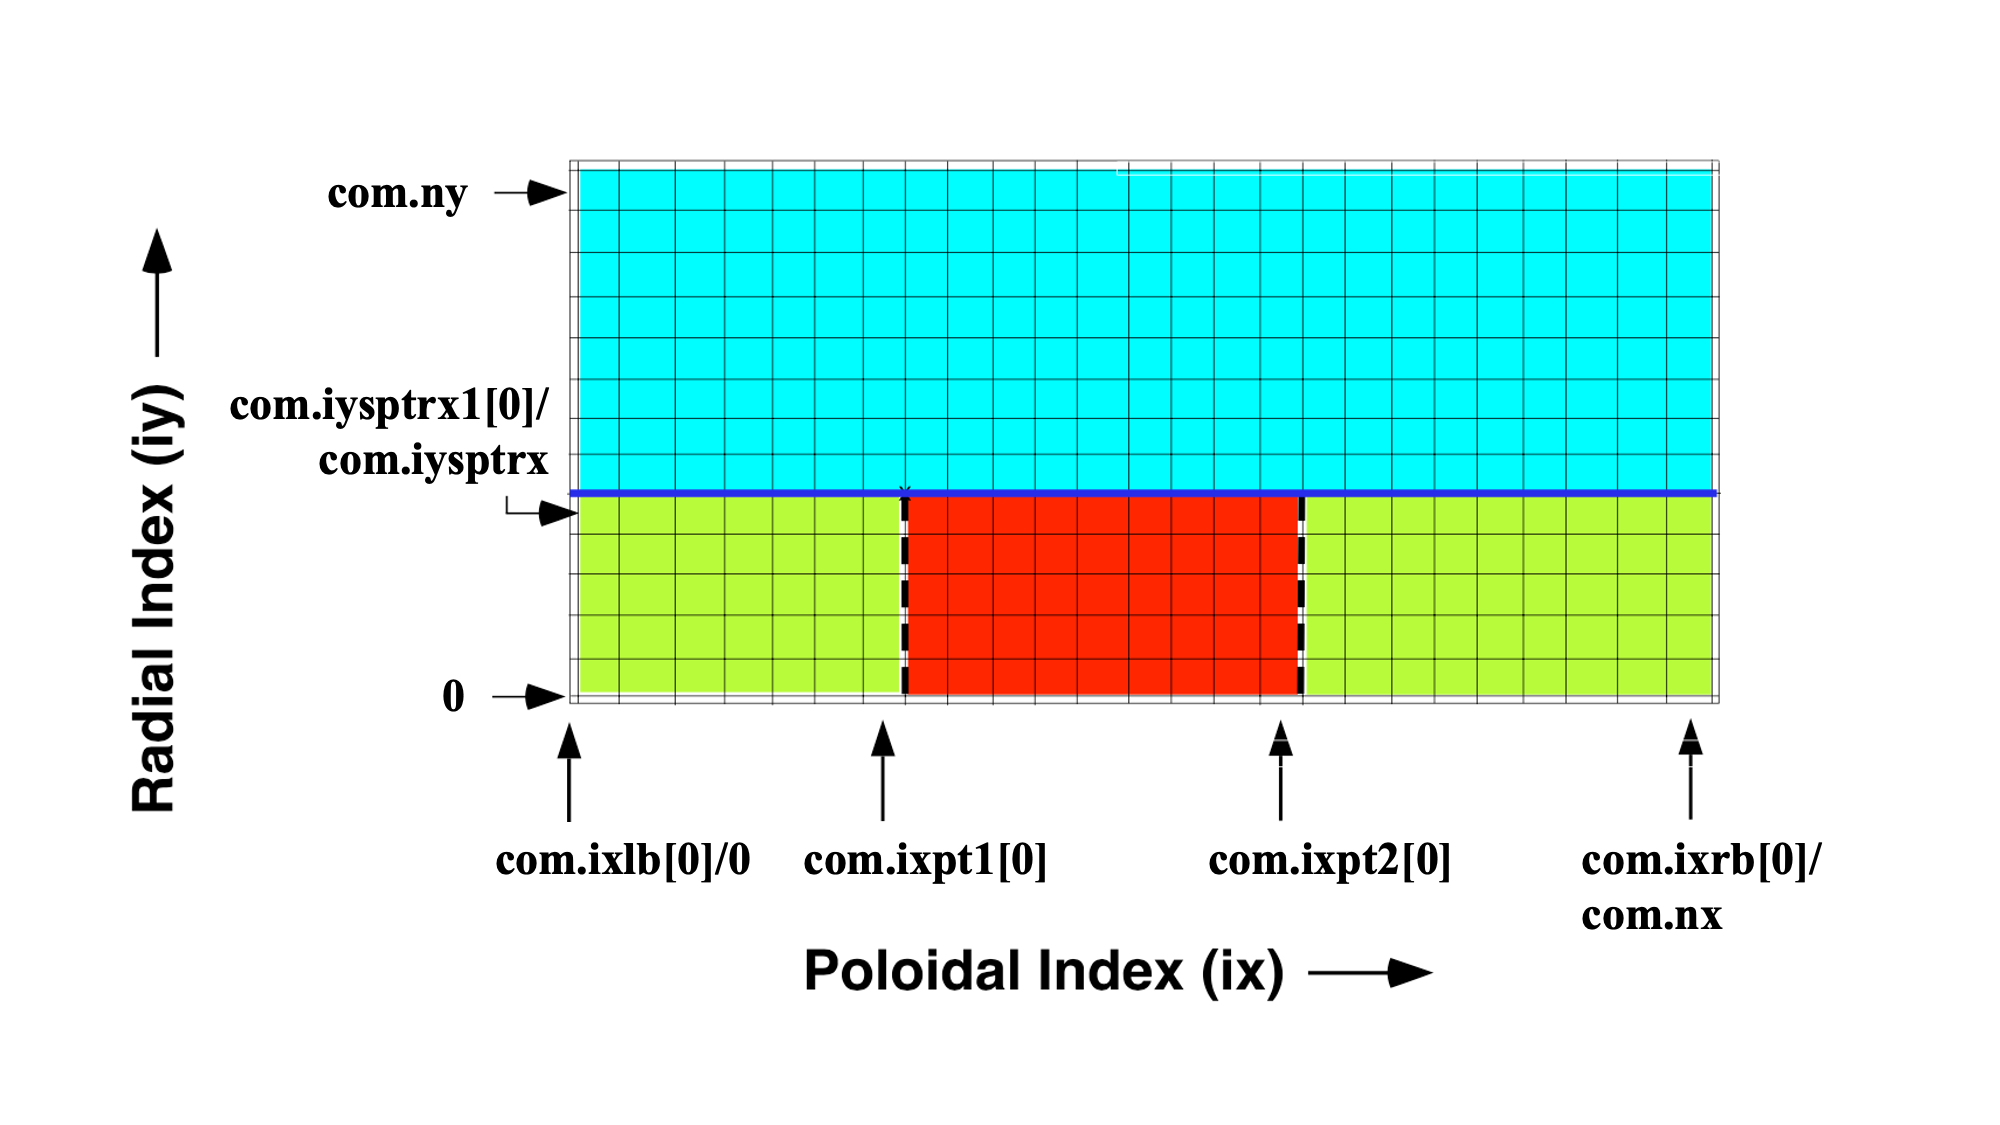

UEDGE uses a rectangular index-space map, where the computational domain is padded by a layer of so-called guard-cells. These guard-cells have an infitisemal volume and their primary use is to impose boundary conditions on the numerical grid. For variables related to velocity and fluxes, UEDGE applies a staggered grid in the poloidal direction, as explained below. Thus, the guard cells are also necessary to access boundary fluxes and velocities. 

In the case of single-null geometries, a single X-point and, thus, separatrix, is present. Thus, the cell radially below the separatrix can be accessed by the variable com.iysptrx in addition to com.iysptrx1[0]. Additionally, the left and right poloidal extremes of the grid are defined by 0 and com.nx+1 in addition to com.ixlb[0] and com.ixrb[0]+1, respectively. 

### The UEDGE single-null patch map<a class="anchor" id="LSN-patch-map"></a>
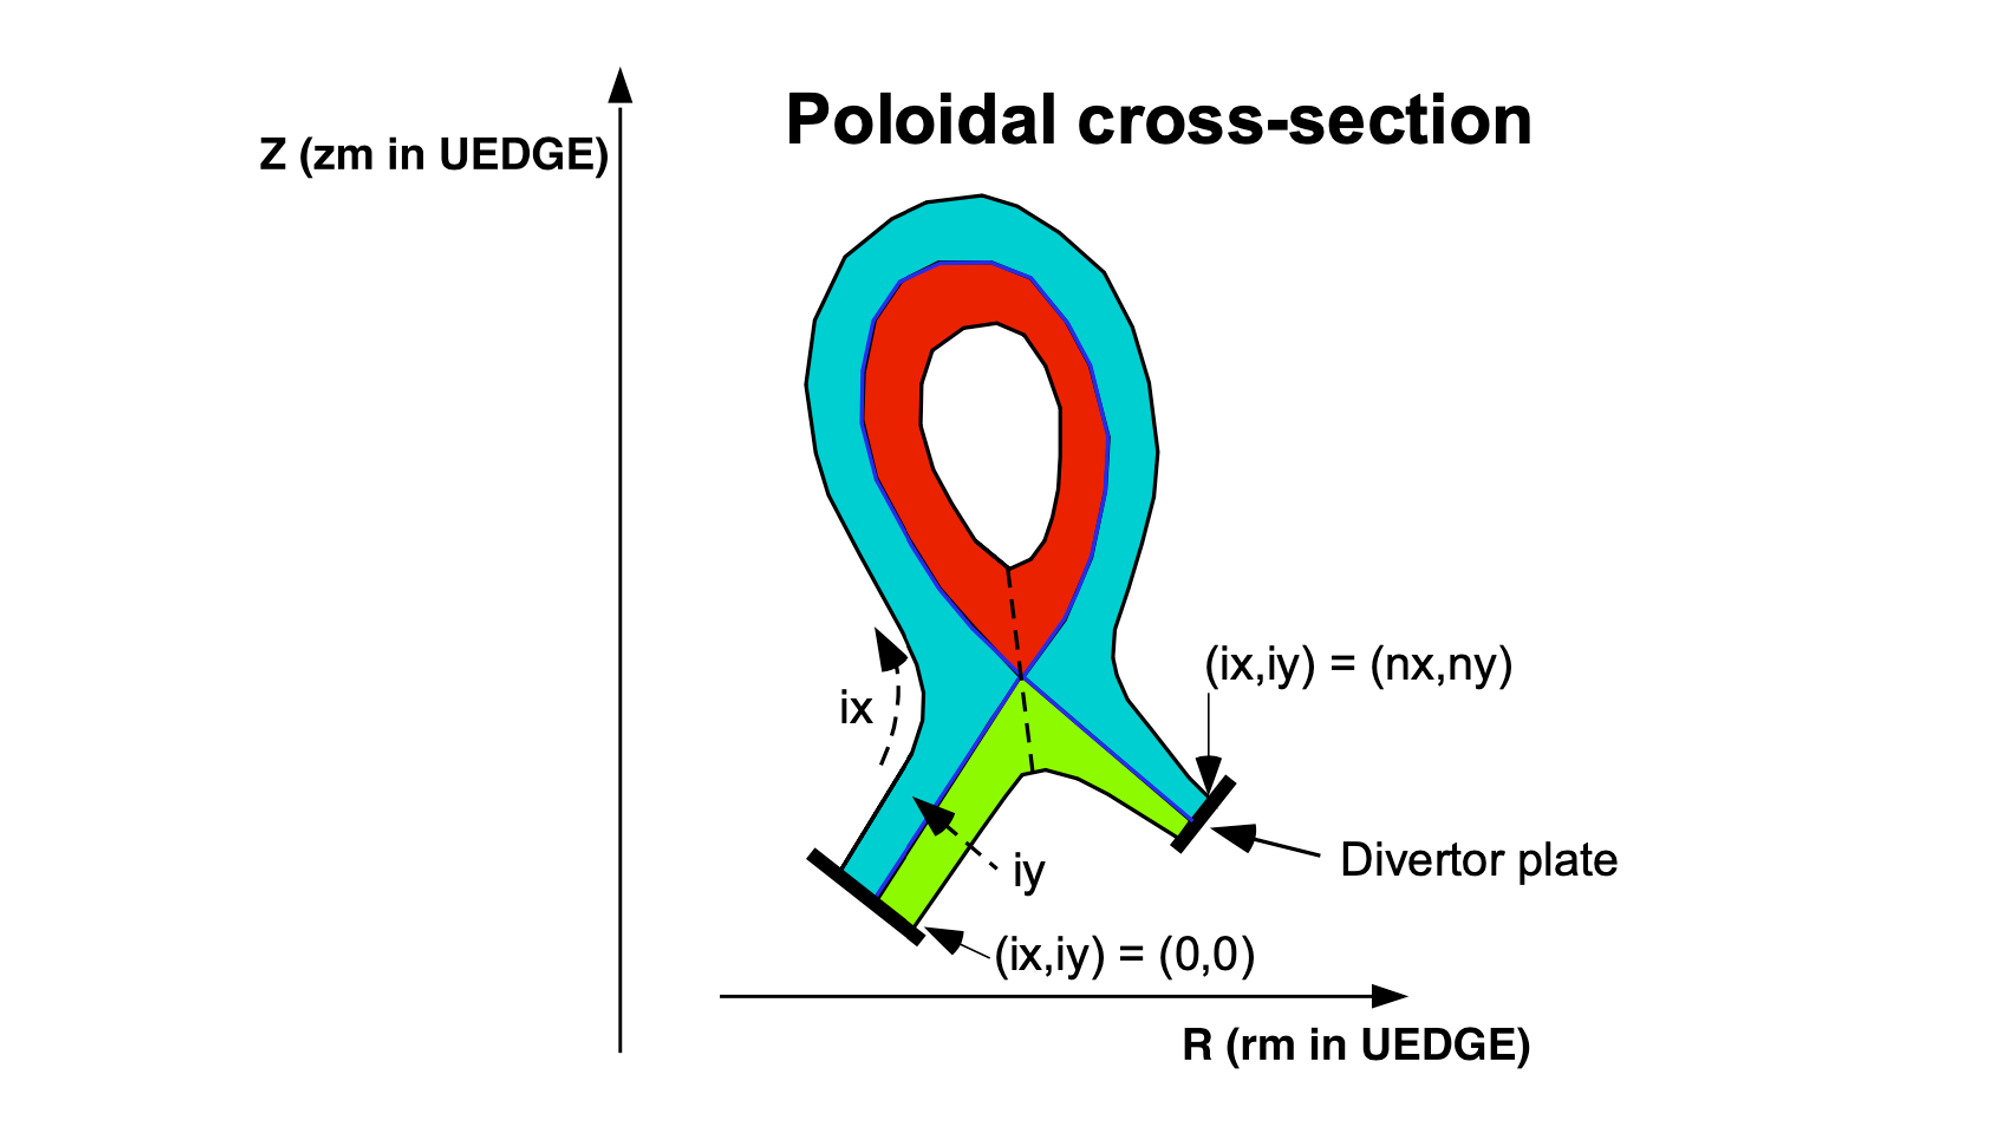
    
The above figure shows a mapping from the index space to the tokamak polodal cross-section, commonly referred to as a patch map. Here, the index space is "cut" in the radial direction along the "eastern" face of the cells com.ixpt1[0] and com.ixpt2[0] from the "southern" private-flux/core boundary to the separatrix. The two private-flux disjoint patches are then connected along the X-point cut, and the core patch is made periodic along the same X-point cut. The resulting geometry will, thus, always have the same number of radial cells in the private-flux and core regions.

Note that com.ixpt[0] is the index of the last cell in the left private-flux patch before the X-point cut, whereas com.ixpt2[0] is the last cell in the core before the X-point cut. Thus, the "eastern" neighbor of any provate-flux cell (com.ixpt1[0], iy) is (com.ixpt2[0]+1, iy), whereas the "eastern" neighbor of any core cell (com.ixpt2[0], iy) is (com.ixpt1[0]+1, iy), where iy$\leq$com.iysptrx, and vice versa. For iy>com.iysptrx the "eastern" cell neigbors will of ix will be ix+1 as normal.

The arrays bbb.ixm1 and bbb.ixp1 are available to identify the "western" (ix-1) and "eastern" (ix+1) neigboring cells of any particular cell (ix).

### UEDGE array dimensions<a class="anchor" id="array-dimensions"></a>
The first two dimensions of any variable calculated on the UEDGE grid (e.g. temperature, density, velocity, flux) will be (nx+2, ny+2), due to the guard cells padding the numerical domain. Some variables, such as densities, have a third dimension corresponding to the species in question. More details are available in the UEDGE documentation, but in brief, there are two types of arrays: one for ion and one for gas species. The third index is defined as follow for each of these.

#### Ion arrays<a class="anchor" id="ion-arrays"></a>
The elements of the ion arrays are as follow:
[Hydrogenic ion, Hydrogenic atom, Impurity ion #1, Impurity ion #2, ..., Impurity ion #N]
The presence of the hydrogenic atom in the ion array is notable, and must be acknowledged. Its presence in the ion array is necessary to access the inertial momentum equation solved in the parallel direction for the atoms. However, despite the atom values appearing in the ion equation, the settings for the atom species are controlled through the gaseous setup arrays.

#### Gas arrays<a class="anchor" id="gas-arrays"></a>
The elements of the ion arrays are as follow:
[Hydrogenic atoms, <Hydrogenic molecules, if present>, Impurity atom #1, Impurity atom #2, ...]
Here, the presence of hydrogenic molecules is controlled by the switch bbb.ishymol: if the switch =0 molecules npt are present, which is the default. If bbb.ishymol=1, molecules are present and occupy the second index in gas equaitons. In case molecules are not present, the arrays are shifted so that the impurity atom becomes the second index.

A more detailed explanation of the arrays and their controls can be found in the UEDGE documentation. The function Case.about_uedge_setup can provide information about the setup of a specific UEDGE case, as explained in the next chapter.

### UEDGE nodes and staggered grid<a class="anchor" id="nodes-grid"></a>
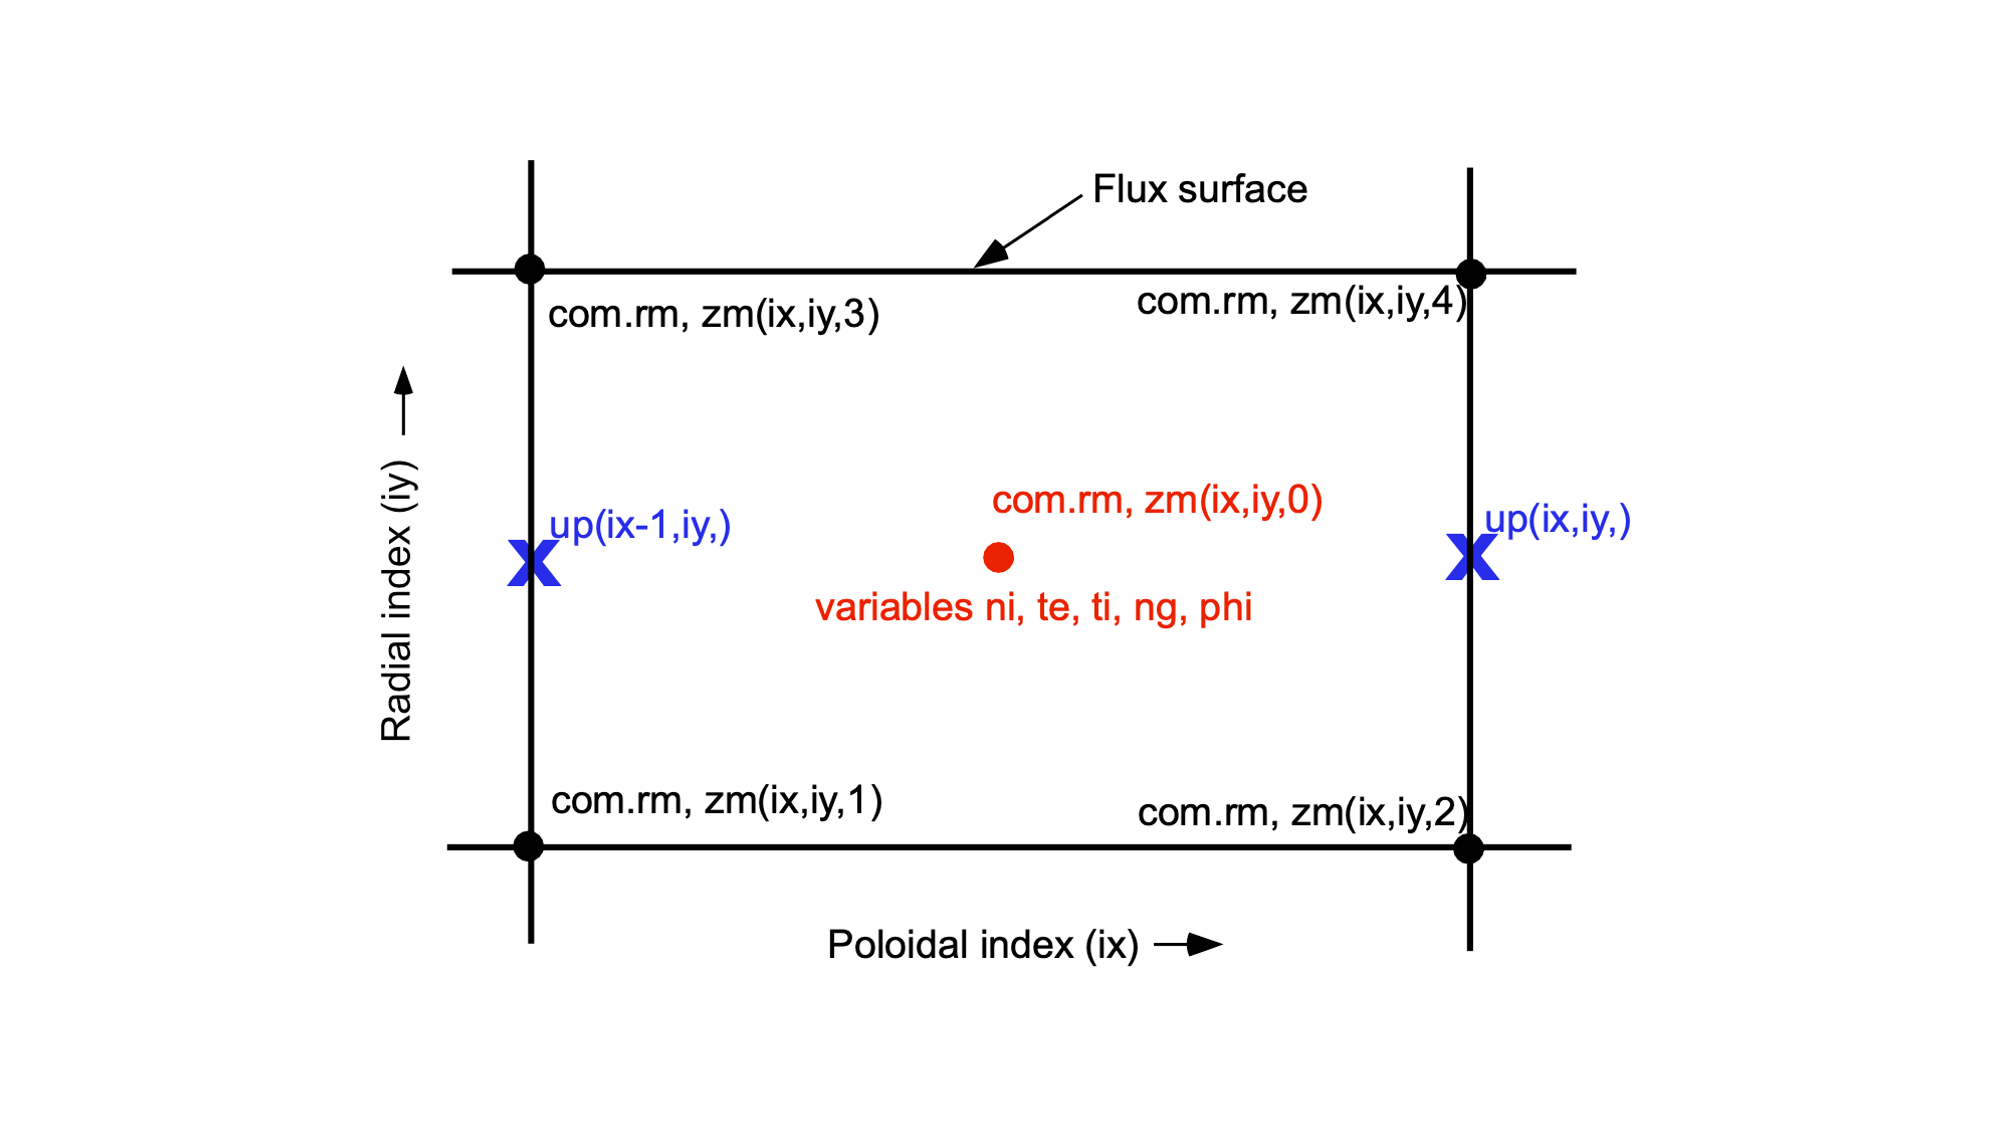

#### Cell structure<a class="anchor" id="cell-structure"></a>
The UEDGE computational domain is defined by a grid, made up by a number of individual cells. The physical properties of the cells are defined by the three-dimensional arrays com.rm and com.zm for radial and vertical position, respectively. The first two dimensions identify the cell in index space, (ix, iy), whereas the third dimension specifies the geometric location of one of five nodes, defined as follows:
<ol start="0">
  <li>Cell center</li>
  <li>SW corner</li>
  <li>SE corner</li>
  <li>NE corner</li>
  <li>NW corner</li>
</ol>

The surfaces connecting the nodes in the poloidal and radial direction are defined as poloidal and radial flux-surfaces, respectively, and enclose the cell. Arrays following the same convention for the geometric propoerties of the grid are also defined for the magnetic field (radial, vertical, poloidal, radial) and magnetic flux. 


#### Staggered grids<a class="anchor" id="staggered-grids"></a>
UEDGE uses two types of variables, defined by the type of grid they use, staggered and cell-center variables. All directional variables (e.g. fluxes and velocities) are evaluated on flux-surfaces, whereas non-directional variables (e.g. densities, energies/temperatures, etc.) are evaluated for the cell-center. The staggered variables are defined at the "northern" and "eastern" boundaries for each cell, with the positive direction being directed outwards from the cell in question.